<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/Temporary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Map Driver##

In [285]:
#from google.colab import drive
#drive.mount('/content/drive')

##Import Packages ## 

In [286]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import pandas.plotting as pdplt

##Read Data##

In [287]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [288]:
print("Problematic records in training data: ",train_data.isnull().sum().sum())
print("Problematic records in test data: ",test_data.isnull().sum().sum())

Problematic records in training data:  0
Problematic records in test data:  0


##Train Data Preprocessing##

Dataset Shape

In [289]:
print(train_data.shape)

(6237, 9)


Peek of the data

In [290]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Data type for each column

In [291]:
print(train_data.dtypes)

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object


Statistical summary

In [292]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

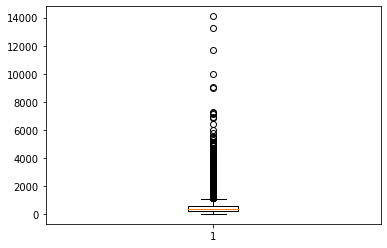

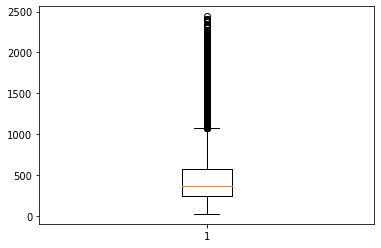

In [293]:
plt.boxplot(train_data['Price'])
plt.show()
q1 = np.percentile(train_data.Price, 25)  # Q1
q3 = np.percentile(train_data.Price, 75)  # Q3
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()

Reviews Normalization

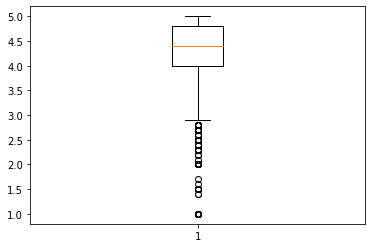

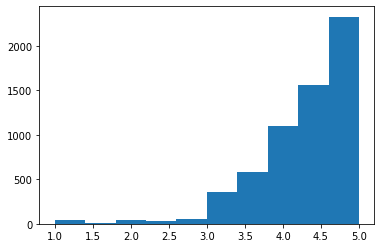

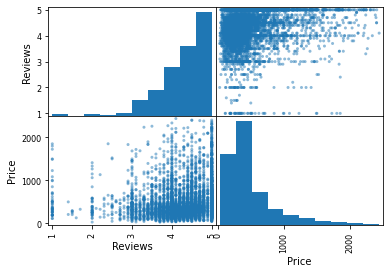

In [294]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()
pdplt.scatter_matrix(train_data[['Reviews','Price']])
plt.show()
train_data['Reviews'] = (train_data.Reviews - train_data.Reviews.min())/(train_data.Reviews.max() - train_data.Reviews.min()) # normalize reviews 


Ratings Normalization

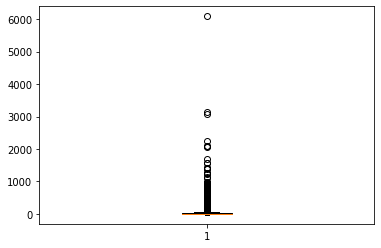

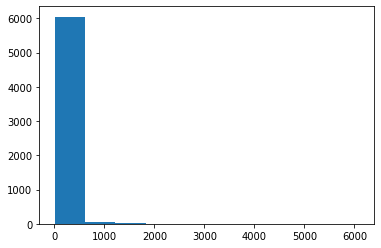

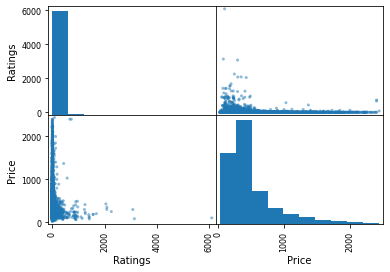

In [295]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()
pdplt.scatter_matrix(train_data[['Ratings','Price']])
plt.show()
train_data['Ratings'] = (train_data.Ratings - train_data.Ratings.min())/(train_data.Ratings.max() - train_data.Ratings.min()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [296]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [297]:
train_data['Edition'] = train_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
editions = train_data['Edition'].unique()
print(editions)
train_data['Edition_(Chinese)'] = 0 
train_data= pd.get_dummies(train_data, columns= ['Edition'])
#train_data.pop('Edition')

['Paperback' 'Hardcover' 'Mass Market Paperback' 'Sheet music'
 'Flexibound' 'Plastic Comb' 'Loose Leaf' 'Tankobon Softcover'
 'Perfect Paperback' 'Board book' 'Cards' 'Spiral-bound' '(Kannada)'
 'Library Binding' '(German)' 'Leather Bound' '(French)' '(Spanish)']


In [298]:
train_data.head()

,Reviews,Ratings,BookCategory,Price,Edition_(Chinese),Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,0.750,0.001150,Action & Adventure,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.725,0.002135,"Biographies, Diaries & True Accounts",202.93,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.950,0.000821,Humour,299.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.775,0.001971,"Crime, Thriller & Mystery",180.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.000,0.000000,"Arts, Film & Photography",965.62,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Book Category Normalization / Extract Categories

In [299]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [300]:
z = train_data

In [301]:
train_data.head()

,Reviews,Ratings,Price,Edition_(Chinese),Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,0.750,0.001150,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.725,0.002135,202.93,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.950,0.000821,299.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.775,0.001971,180.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.000,0.000000,965.62,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [302]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
test_data['Reviews'] = (test_data.Reviews - test_data.Reviews.mean())/(test_data.Reviews.std()) # normalize reviews 

Ratings Normalization

In [303]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
test_data['Ratings'] = (test_data.Ratings - test_data.Ratings.mean())/(test_data.Ratings.std()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [304]:
test_data.pop('Author')
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [305]:
test_data['Edition'] = test_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
test_editions = test_data['Edition'].unique()
total_editions = np.unique(np.append(editions,test_editions))
print(total_editions)
test_data= pd.get_dummies(test_data, columns= ['Edition'])
test_data[editions] = 0
#test_data.pop('Edition')

['(Chinese)' '(French)' '(German)' '(Kannada)' '(Spanish)' 'Board book'
 'Cards' 'Flexibound' 'Hardcover' 'Leather Bound' 'Library Binding'
 'Loose Leaf' 'Mass Market Paperback' 'Paperback' 'Perfect Paperback'
 'Plastic Comb' 'Sheet music' 'Spiral-bound' 'Tankobon Softcover']


In [306]:
test_data.head()

,Reviews,Ratings,BookCategory,Edition_(Chinese),Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Sheet music,Edition_Spiral-bound,Paperback,Hardcover,Mass Market Paperback,Sheet music,Flexibound,Plastic Comb,Loose Leaf,Tankobon Softcover,Perfect Paperback,Board book,Cards,Spiral-bound,(Kannada),Library Binding,(German),Leather Bound,(French),(Spanish)
0,0.140178,5.627725,"Crime, Thriller & Mystery",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.038851,-0.198467,"Computing, Internet & Digital Media",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.038851,-0.180241,Romance,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.309159,-0.137714,"Computing, Internet & Digital Media",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.140178,-0.149865,"Language, Linguistics & Writing",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Book Category Normalization / Extract Categories

In [307]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [308]:
z_test = test_data
z_test.head()

,Reviews,Ratings,Edition_(Chinese),Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Sheet music,Edition_Spiral-bound,Paperback,Hardcover,Mass Market Paperback,Sheet music,Flexibound,Plastic Comb,Loose Leaf,Tankobon Softcover,Perfect Paperback,Board book,Cards,Spiral-bound,(Kannada),Library Binding,(German),Leather Bound,(French),(Spanish),"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,0.140178,5.627725,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.038851,-0.198467,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.038851,-0.180241,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.309159,-0.137714,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.140178,-0.149865,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##Training Feed Forward Model##

Split Train Set in Train  & Validation Sets(70/30)

In [309]:
############# inputs to the neural network #######################
train_set = z.sample(frac=0.7,random_state=200)
validation_set = z.drop(train_set.index)
######################### normalized target outputs for training set##########
y_train_set = train_set.pop('Price')
y_train_set_max = y_train_set.max()
y_train_set_min = y_train_set.min()
y_train_set = (y_train_set - y_train_set_min) /( y_train_set_max - y_train_set_min)

########################## normalized target outputs for validation set #######
y_validation_set = validation_set.pop('Price')
y_validation_set_max = y_validation_set.max()
y_validation_set_min = y_validation_set.min()
y_validation_set = (y_validation_set - y_validation_set_min) /( y_validation_set_max - y_validation_set_min)

Import tensorflow

In [310]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Build model/neural network

In [311]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid', input_shape=(train_set.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1,activation='sigmoid'))

In [312]:
network.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


Compile model

In [313]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                ) # Mean squared error

Model Training

In [314]:
# Train neural network
history = network.fit(train_set, # Features
                      y_train_set, # Target vector
                      epochs=30, # Number of epochs
                      verbose=1, # Output
                      batch_size=100, # Number of observations per batch
                      validation_data=(validation_set,y_validation_set)) # Data for evaluation

Epoch 1/30
43/43 [==============================] - 1s 6ms/step - loss: 0.1735 - val_loss: 0.0386
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.0262
Epoch 3/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0258
Epoch 4/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0253
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.0248
Epoch 6/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0243
Epoch 7/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0237
Epoch 8/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0232
Epoch 9/30
43/43 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.0227
Epoch 10/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0223
Epoch 11/30
43/43 [

##Predict Prices Using Feed Forward Neural Network##

Predict

In [315]:
predictions = network.predict(z_test)


ValueError: ignored

Denormalize

In [ ]:
actual_prices = (predictions*(y_train_set_max - y_train_set_min)) + y_train_set_min

Save prediction to Excel File

In [ ]:
df = pd.DataFrame(actual_prices.astype(int))
df.columns=['Price']
filepath = 'Predictions.xlsx'
df.to_excel(filepath, index=False)
df.head()

##Radial Basis Function## 

Create custom RBF Layer

In [ ]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

Create Network

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy


# Start neural network
network2 = models.Sequential()

network2.add(layers.Dense(units=50, activation='sigmoid', input_shape=(train_set.shape[1],)))

network2.add(RBFLayer(400, 0.4))

# Add fully connected layer with no activation function
network2.add(layers.Dense(units=1,activation='sigmoid'))

network2.compile(optimizer='rmsprop', loss=binary_crossentropy)

In [ ]:
# Train neural network
history2 = network2.fit(train_set, # Features
                      y_train_set, # Target vector
                      epochs=40, # Number of epochs
                      verbose=1, # Output
                      batch_size=100, # Number of observations per batch
                      validation_data=(validation_set,y_validation_set)) # Data for evaluation

##Predict Prices Using Radial Basis Function##

Predict

In [ ]:
predictions2 = network2.predict(z_test)

Denormalize

In [ ]:
actual_prices2 = (predictions2*(y_train_set_max - y_train_set_min)) + y_train_set_min

Save Predictions to Excel File

In [ ]:
df2 = pd.DataFrame(actual_prices2.astype(int))
df2.columns=['Price']
filepath = 'Predictions2.xlsx'
df2.to_excel(filepath, index=False)
df2.head()